<a href="https://colab.research.google.com/github/AkshatDev2057/dc-mini-project-sg-1/blob/main/Tokenization%26Embeddings_AkshatDev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""Task 1.1 - Reason why sub-word tokenization is optimal than tokenizing by word by word?
Tokenization is basically a method to give a number to a word or a sub-word (sub-word tokenization methods are optimal) to effectively represent a piece of text as a list of numbers.
Sub-word tokenization is a method used to break words down into smaller sub-tokens. It is based on the concept that many words in a language share common prefixes or suffixes, and by breaking words into smaller units, we can handle rare and out-of-vocabulary words more effectively.
Subword tokenization outperforms traditional word-by-word tokenization in several crucial aspects:

1.Vocabulary Coverage

Subword tokenization: Effectively handles out-of-vocabulary words by breaking them into smaller, familiar units.
word-by-word: Struggles with unfamiliar words, often replacing them with generic tokens like <UNK>.
Example :
Word: "unfriendliness"
Subword: "un" + "friend" + "li" + "ness"
Word-by-word: "<UNK>" (if not in vocabulary)
Here, subword tokenization breaks down a potentially unfamiliar word into recognizable parts, while word-by-word might treat it as unknown.

2.Model Efficiency

Subword tokenization: Significantly reduces vocabulary size, leading to more compact models and faster processing.


Word-by-word: Requires larger vocabularies, resulting in bulkier models and slower computations.
Example:
Vocabulary size for 10,000 words:
Subword: ~5,000 subword tokens
Word-by-word: 10,000 tokens
Subword tokenization typically requires fewer unique tokens to represent the same vocabulary, leading to smaller models.

3.Morphological Understanding

Subword tokenization: Captures meaningful subunits within words, enhancing understanding of word structure and meaning.
Word-by-word: Treats each word as an atomic unit, missing internal word structure and relationships.
Example:-
Word: "playfully"
Subword: "play" + "ful" + "ly"
Word-by-word: "playfully"
Subword tokenization captures the root word and suffixes, providing insight into the word's structure and meaning.

4.Language Flexibility

Subword tokenization: Adapts well to various languages, including those with complex morphology or agglutinative structures.


Word-by-word: Often struggles with languages that have rich morphology or frequent compound words.
Example:
German compound word: "Klimaanlage" (air conditioner)
Subword: "Klima" + "anlage"
Word-by-word: "Klimaanlage"
Subword tokenization can break down compound words, which is particularly useful for languages like German that frequently use them.
Especially in such cases , Sub-word tokenization dominates over the word-by-word tokenization.
5.Rare Word Handling

Subword tokenization: Improves representation of rare words by breaking them into more common subunits.


Word-by-word: Typically provides poor representations for rare words due to limited exposure during training.
Examples for these are many , let’s consider : -
Rare word: "cryptocurrency"
Subword: "crypto" + "currency"
Word-by-word: "<UNK>" or poorly represented "cryptocurrency"

6.Cross-lingual Capabilities

Subword tokenization: Facilitates multilingual model development with methods that work across languages.


Word-by-word: Often requires language-specific preprocessing, making multilingual modeling more challenging.
	Example :
	English: "multilingual"
Spanish: "multilingüe"
Subword: "multi" + "lingual" / "multi" + "lingüe"
Word-by-word: Treated as separate, unrelated words


By addressing these key areas, subword tokenization offers a more robust, efficient, and versatile approach to text processing compared to traditional word-by-word methods, making it the preferred choice for many modern NLP tasks.
Therefore we can clearly see that subword tokenization works much better when compared to word-by-word."""


'Task 1.1 - Reason why sub-word tokenization is optimal than tokenizing by word by word? \nTokenization is basically a method to give a number to a word or a sub-word (sub-word tokenization methods are optimal) to effectively represent a piece of text as a list of numbers.\nSub-word tokenization is a method used to break words down into smaller sub-tokens. It is based on the concept that many words in a language share common prefixes or suffixes, and by breaking words into smaller units, we can handle rare and out-of-vocabulary words more effectively.\nSubword tokenization outperforms traditional word-by-word tokenization in several crucial aspects:\n\n1.Vocabulary Coverage\n\nSubword tokenization: Effectively handles out-of-vocabulary words by breaking them into smaller, familiar units.\nword-by-word: Struggles with unfamiliar words, often replacing them with generic tokens like <UNK>.\nExample : \nWord: "unfriendliness"\nSubword: "un" + "friend" + "li" + "ness"\nWord-by-word: "<UNK>"

In [ ]:
sentences_class1 = ["Love is in the air this Valentine's Day.","Roses are red, violets are blue.","Cupid's arrow strikes on February 14th.",
                  "Romantic dinners and candlelit evenings await."
                  ,"Heart-shaped chocolates fill store shelves."
                  ,"Valentine's cards express heartfelt emotions."
                  ,"Couples exchange gifts on this special day."
                  ,"Love songs play softly in the background."
                  ,"Red and pink decorations adorn the streets."
                  ,"A single rose can say 'I love you'."]
sentences_class2 =["Christmas is the season of giving."
                  ,"Santa Claus comes to town on Christmas Eve."
                  ,"Bake cookies and leave them for Santa."
                  ,"Decorate the Christmas tree with ornaments."
                  ,"Carolers sing festive songs door to door."
                  ,"Stockings are hung by the chimney with care."
                  ,"Families gather for a Christmas feast."
                  ,"Mistletoe hangs above the doorway."
                  ,"Children eagerly await Christmas morning."
                ,"The smell of pine fills the air."]

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
sentences = sentences_class1

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

print("Sentence embeddings:")
print(sentence_embeddings)


Sentence embeddings:
tensor([[-0.0669, -0.0233,  0.1027,  ...,  0.0042,  0.0066,  0.0391],
        [-0.0161,  0.0042,  0.0692,  ...,  0.0082,  0.0646,  0.0266],
        [ 0.0432,  0.0450,  0.0372,  ...,  0.0261,  0.0099,  0.0308],
        ...,
        [ 0.0380, -0.0018,  0.0512,  ...,  0.0833,  0.0900, -0.0153],
        [ 0.0103,  0.0514,  0.0182,  ...,  0.0004, -0.0274,  0.0208],
        [-0.0710,  0.0556,  0.1147,  ...,  0.0122,  0.0361, -0.0110]])


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
sentences = sentences_class2

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
sentence_embeddings_2 = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
sentence_embeddings_2 = F.normalize(sentence_embeddings_2, p=2, dim=1)

print("Sentence embeddings:")
print(sentence_embeddings_2)


Sentence embeddings:
tensor([[-0.0322,  0.0615,  0.0143,  ..., -0.0518,  0.0189,  0.0519],
        [ 0.0967,  0.1104, -0.0520,  ...,  0.0114,  0.0374, -0.0386],
        [ 0.0573,  0.0888,  0.0024,  ..., -0.0550, -0.0966, -0.0402],
        ...,
        [ 0.0581,  0.0564, -0.0056,  ...,  0.0299,  0.0032,  0.0530],
        [ 0.0138,  0.0618,  0.0020,  ..., -0.0407,  0.0298,  0.0640],
        [ 0.0616, -0.0344,  0.0954,  ..., -0.0147, -0.0586,  0.0345]])


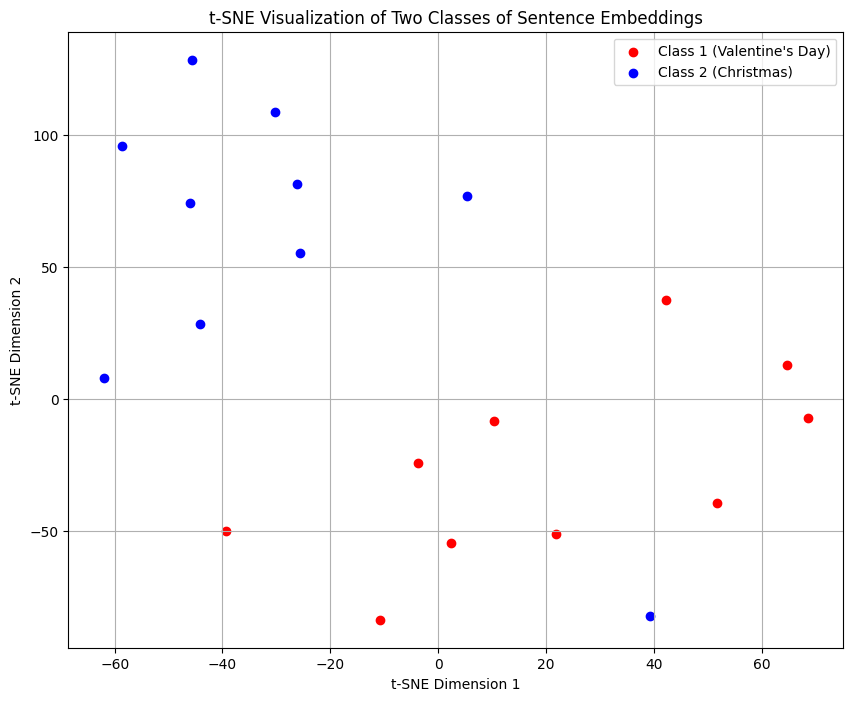

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Combine both classes into a single dataset
embeddings = np.vstack((sentence_embeddings,sentence_embeddings_2))

# Create labels for the two classes (0 for Class 1, 1 for Class 2)
labels = np.array([0] * len(sentence_embeddings) + [1] * len(sentence_embeddings_2))

# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Visualize the t-SNE results
plt.figure(figsize=(10, 8))

# Scatter plot for Class 1
plt.scatter(
    embeddings_2d[labels == 0, 0], embeddings_2d[labels == 0, 1],
    color='red', label='Class 1 (Valentine\'s Day)'
)

# Scatter plot for Class 2
plt.scatter(
    embeddings_2d[labels == 1, 0], embeddings_2d[labels == 1, 1],
    color='blue', label='Class 2 (Christmas)'
)

# Add labels and legend
plt.title("t-SNE Visualization of Two Classes of Sentence Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
"""As we can clearly see the two classes of the dataset is differently clustered
  we can say that the type of embedding used is contextual or dynamic ."""


'As we can clearly see the two classes of the dataset is differently clustered\n  we can say that the type of embedding used is contextual or dynamic .'